# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## Task 1
For every column in the data:

a. State whether the values match the description given in the table above.

b. State the number of missing values in the column.

c. Describe what you did to make values match the description if they did not
match.


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

food_claims = pd.read_csv('food_claims_2212.csv')

print(food_claims.dtypes)
print(food_claims.isnull().sum())

for column in food_claims.columns:
    unique_values = food_claims[column].unique()
    value_counts = food_claims[column].value_counts()
    print(f"Value counts in column '{column}': \n{value_counts}\n")

overall_median_amount_paid = food_claims['amount_paid'].median()
print(overall_median_amount_paid)

# Replace missing values in 'amount_paid' with the overall median
food_claims['amount_paid'].fillna(overall_median_amount_paid, inplace=True)
    


claim_id                  int64
time_to_close             int64
claim_amount             object
amount_paid             float64
location                 object
individuals_on_claim      int64
linked_cases             object
cause                    object
dtype: object
claim_id                 0
time_to_close            0
claim_amount             0
amount_paid             36
location                 0
individuals_on_claim     0
linked_cases            26
cause                    0
dtype: int64
Value counts in column 'claim_id': 
1       1
1330    1
1343    1
1342    1
1341    1
       ..
662     1
661     1
660     1
659     1
2000    1
Name: claim_id, Length: 2000, dtype: int64

Value counts in column 'time_to_close': 
176    45
180    44
178    39
182    36
175    36
       ..
406     1
350     1
518     1
90      1
269     1
Name: time_to_close, Length: 256, dtype: int64

Value counts in column 'claim_amount': 
R$ 74474.55    1
R$ 61888.78    1
R$ 30788.31    1
R$ 58013.28    1
R$ 3

**claim_id:** The unique identifier of the claim has 2000 unique values. There are no missing values. Type of variable was change from 'int64' to 'category' using as .astype(). 

**time_to_close:** There are 256 unique values. There are no missing values. No changes were made to the column.

**claim_amount:** There are 2000 unique values. There are no missing values. There were changed the type of variable to match the description, from 'Object' to 'Continuous' type. The symbol of the currency '$R' was removed in all values.

**amount_paid:** There are 1963 unique values. There are 36 missing values that were replace by the overall median, 20105.70 . 

**location:** There are 4 categories, that match the description. There are no missing values. No changes were made to the column.

**individuals_on_claim:** There are 15 unique values (individuals). Minimum of indivuals is 1. There are no missing values. No changes were made to the column. 

**linked_cases:** There are 1493 values of False and 481 values of True. There are 26 missing values that were replaced with FALSE.

**cause:** There were 5 categories, that doesn't match the 3 categories of the description. Two of the categories name represent the same value: 'meat'/'Meat' and 'vegetable'/'VEGETABLES'. Category were replaced to match the same name (lowercase and singular). There are no missing values. 

## Task 2
Create a visualization that shows the number of claims in each location. Use the
visualization to:

a. State which category of the variable location has the most observations

b. Explain whether the observations are balanced across categories of the
variable location

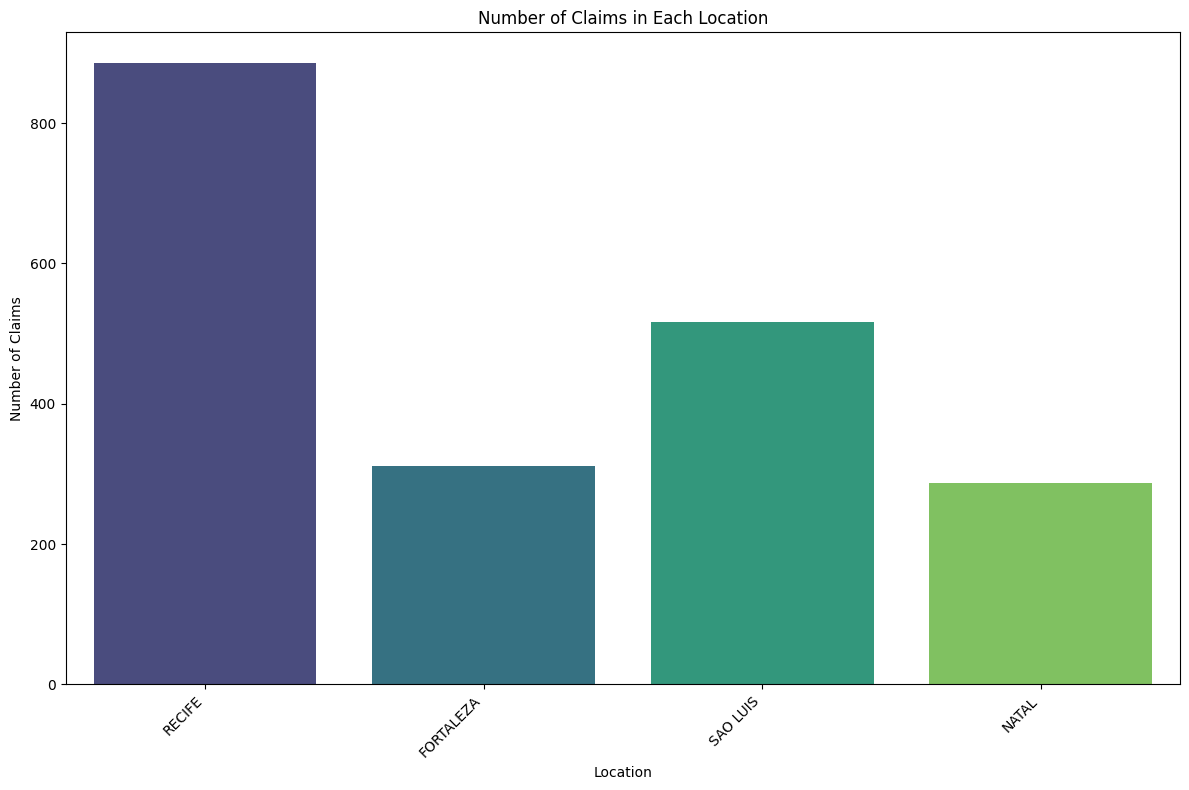

In [41]:
plt.figure(figsize=(12, 8))
sns.countplot(data=food_claims, x='location', palette='viridis')
plt.xlabel('Location')
plt.ylabel('Number of Claims')
plt.title('Number of Claims in Each Location')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

There are 4 locations represented in the graphic. The location with the most number of claims is 'RECIFE', with more 800 claims. The other locations were unbalanced in number of claims. 'RECIFE' has almost 3 times more claims when compared with locations 'FORTALEZA' and 'NATAL' that have around 300 claims. The legal team should focus in clamis of 'RECIFE' to balance the results.

## Task 3
Describe the distribution of time to close for all claims. Your answer must include a
visualization that shows the distribution.

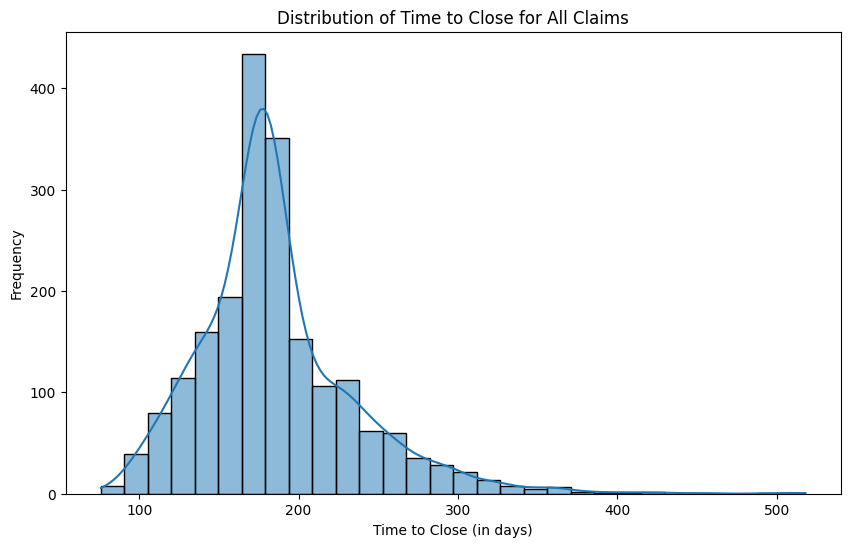

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(data=food_claims, x='time_to_close', bins=30, kde=True)
plt.xlabel('Time to Close (in days)')
plt.ylabel('Frequency')
plt.title('Distribution of Time to Close for All Claims')
plt.show()

To analyze the time it takes to reply to customers and close claims, we've represented the data using a graphic that shows the distribution of days it takes to close each claim. The graphic is a histogram or a line plot, and from it, we can draw the following insights:

Skewed Distribution: The distribution of days to close claims is right-skewed, indicating that most claims are closed relatively quickly, with a smaller number of claims taking longer periods to be resolved.

Common Timeframe: The majority of claims close within a relatively short timeframe, with less than 200 days. This suggests that the legal department is generally efficient in processing and resolving claims.

Unusual Delays: However, there are a few claims that take longer to close, surpassing 400 days. These outliers represent unusual delays, which may require further investigation to identify potential reasons for the extended processing time.

The graphic allows us to understand the overall distribution of the time it takes to close claims, with most claims resolved in less than 200 days. However, the presence of outliers with extended processing times suggests the need for further analysis to address any potential issues causing delays in certain cases. This information can help the legal team in identifying areas for improvement and optimizing their claim resolution process.

## Task 4
Describe the relationship between time to close and location. Your answer must
include a visualization to demonstrate the relationship.


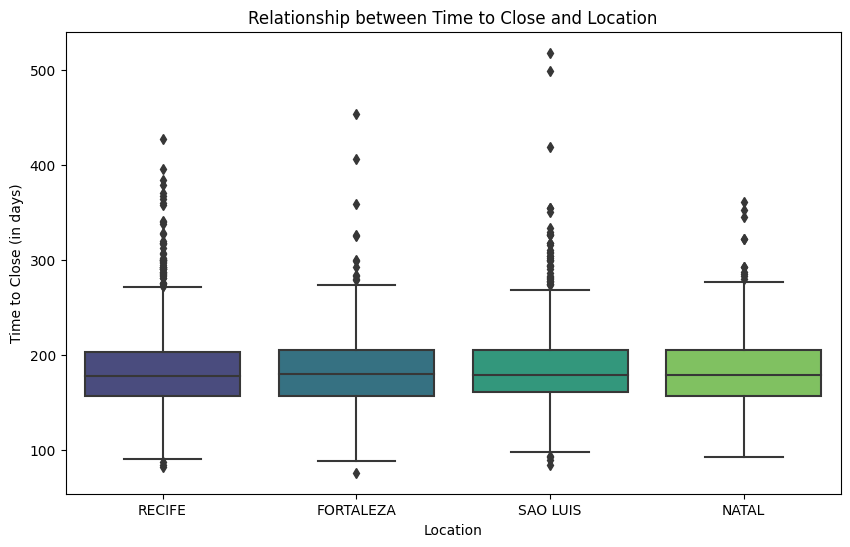

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=food_claims, x='location', y='time_to_close', palette='viridis')
plt.xlabel('Location')
plt.ylabel('Time to Close (in days)')
plt.title('Relationship between Time to Close and Location')
plt.show()


To analyze the relationship between time to close and location, we've visualized the data using a box plot, with the 'time to close' on the y-axis and the 'location' on the x-axis. The visualization has provided us with the following insights:

Similar Time to Close: Across the different locations, the time it takes to close claims appears to be relatively similar, as indicated by the similar interquartile range values (between 150 and 200 days) and median. This suggests that, regardless of the location, the legal team takes a consistent amount of time to respond to and close claims.

High Volume in RECIFE location: Interestingly, as observed in Task #2, the location 'RECIFE' has almost three times more claims than the other three locations. Despite this higher claim volume, the time it takes to close claims in 'RECIFE' remains comparable to the other locations. This observation could indicate that the legal team efficiently handles the increased claim workload in RECIFE, maintaining a consistent response time.

Presence of Outliers: For all locations, we observe the presence of outliers in the data. These outliers represent claims that take significantly longer to close than the typical time frame. Identifying and investigating these outliers could be valuable in understanding the factors contributing to delays in claim resolution.

The visualization demonstrates that the legal team's response time to close claims is relatively consistent across different locations. The presence of outliers highlights specific claims that require further attention and potential process improvement. Additionally, the higher claim volume in RECIFE, coupled with similar response times, may indicate effective claim management practices in that location.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam